# Supervised timeseries forecasting

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('AirQualityUCI.csv',sep=';',decimal=',')
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


## Data Wrangling

In [3]:
df = df.drop(['Unnamed: 15','Unnamed: 16'],axis=1)
df = df.dropna() # tail of df
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [4]:

df['datetime'] = pd.to_datetime(df['Date'] + ' '+ df['Time'],format="%d/%m/%Y %H.%M.%S")
df['Date'] = pd.to_datetime(df['Date'],format="%d/%m/%Y")
df = df.set_index('datetime')
df = df.drop(['Time','Date'],axis=1)
df.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
datetime,,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
2004-03-10 19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2004-03-10 20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
2004-03-10 21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
2004-03-10 22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [5]:
df = df.replace(-200,np.nan)
df.isnull().sum()
# sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

In [6]:
df = df.drop(['NMHC(GT)'],axis=1)
df = df.fillna(method='ffill')
# df['PT08.S1(CO)'] = df.groupby('Date')['PT08.S1(CO)'].transform(lambda x: x.fillna(x.mean()))

df.isnull().sum()

CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

## Exploratory Analysis

In [7]:
df.corr().loc['CO(GT)'].sort_values(ascending=False)
# sns.pairplot(df)

CO(GT)           1.000000
NOx(GT)          0.787863
C6H6(GT)         0.779056
PT08.S2(NMHC)    0.769081
PT08.S1(CO)      0.763247
PT08.S5(O3)      0.736989
NO2(GT)          0.693676
PT08.S4(NO2)     0.512432
RH               0.041975
AH               0.023296
T                0.001516
PT08.S3(NOx)    -0.620435
Name: CO(GT), dtype: float64

## One-Step Linear Regression Forecasting

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import Pipeline

In [9]:
def ts_train_test_split(X,y, frac=0.8):
    ind = round(len(X)*frac)
    X_train = X.iloc[:ind]
    X_test = X.iloc[ind:]
    y_train = y.iloc[:ind]
    y_test = y.iloc[ind:]
    return X_train, X_test, y_train, y_test

### Simple Linear Regression

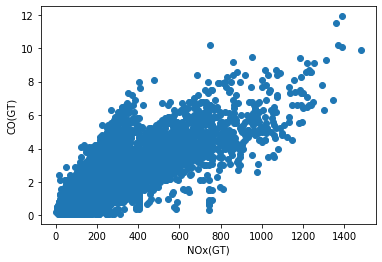

In [26]:
y = df['CO(GT)']
X = df['NOx(GT)']

fig, ax = plt.subplots()
ax.scatter(X,y)
ax.set_xlabel('NOx(GT)')
ax.set_ylabel("CO(GT)")
plt.show()

0.8768830339343365
0.5939770947827875


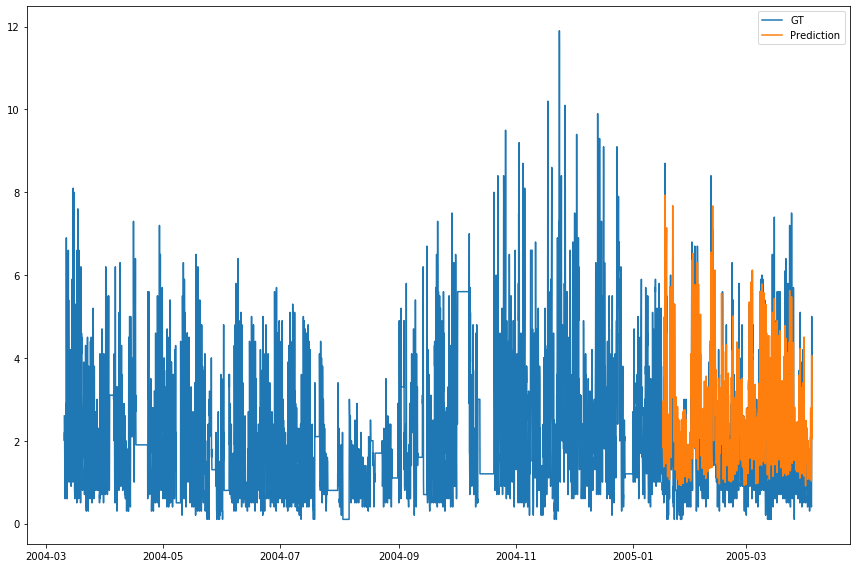

In [30]:
# one-step regression

# prepare training dataset
X_train, X_test, y_train, y_test = ts_train_test_split(X,y, frac=0.8)

X_history = X_train.values
y_history = y_train.values

# make predictions
y_pred = list()

for t in range(len(X_test)):
    model = LinearRegression()
    model.fit(X_history.reshape(-1,1), y_history.reshape(-1,1))

    yhat = model.predict(X_test.iloc[t].reshape(-1,1))

    y_pred.append(yhat[0][0])

    X_history = np.append(X_history,X_test.iloc[t])
    y_history = np.append(y_history,y_test.iloc[t])
        
# calculate out of sample error (MSE) and R^2
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test,y_pred)
print(rmse)
print(r2)


# Plotting
y_pred = pd.Series(y_pred, index=y_test.index)

fig,ax = plt.subplots(figsize=(12,8))
ax.plot(y,label='GT')
ax.plot(y_pred,label='Prediction')
plt.legend()
plt.tight_layout()

### Multiple Linear Regression

In [32]:
y = df['CO(GT)']
X = df[['NOx(GT)','C6H6(GT)']]

0.6404489424312947
0.7834110851821958


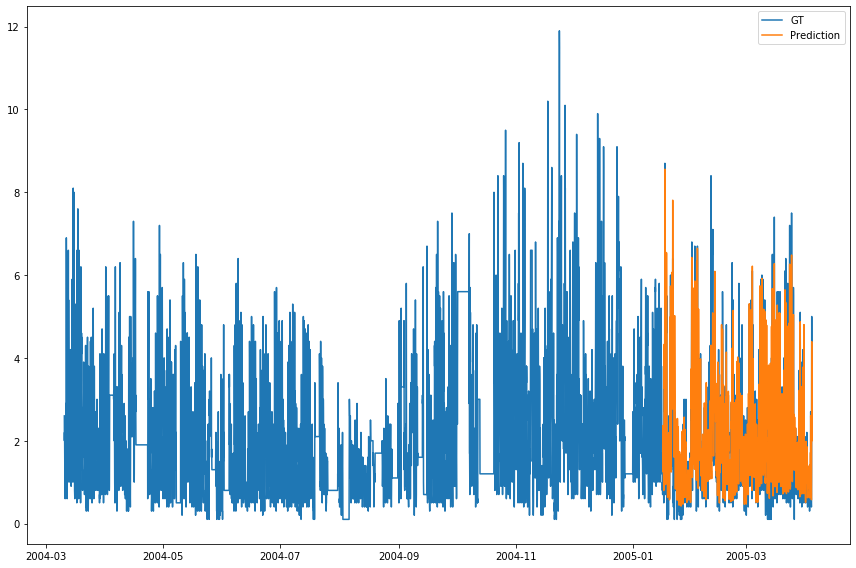

In [33]:
# prepare training dataset
X_train, X_test, y_train, y_test = ts_train_test_split(X,y, frac=0.8)

ncol = X_train.shape[1]
X_history = X_train.values
y_history = y_train.values

# make predictions
y_pred = list()

for t in range(len(X_test)):
    model = LinearRegression()
    model.fit(X_history.reshape(-1,ncol), y_history.reshape(-1,1))

    yhat = model.predict(X_test.iloc[t].values.reshape(-1,ncol))
    y_pred.append(yhat[0][0])

    X_history = np.append(X_history,X_test.iloc[t])
    y_history = np.append(y_history,y_test.iloc[t])
        
# calculate out of sample error (MSE) and R^2
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test,y_pred)
print(rmse)
print(r2)


# Plotting
y_pred = pd.Series(y_pred, index=y_test.index)

fig,ax = plt.subplots(figsize=(12,8))
ax.plot(y,label='GT')
ax.plot(y_pred,label='Prediction')
plt.legend()
plt.tight_layout()